In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./Test_images/virat-kohli.jpg')
img.shape

(192, 192, 3)

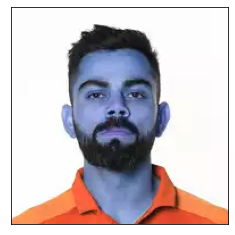

In [3]:
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img.shape

(192, 192)

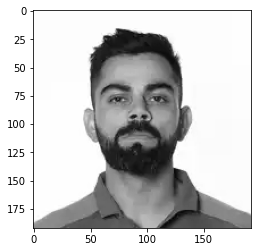

In [5]:
plt.imshow(gray_img, cmap='gray')

In [6]:
#loading prebuild model for detecting face in image
face_cascade = cv2.CascadeClassifier("./haarcascades/haarcascade_frontalface_default.xml")
#loading prebuild model for detecting eyes in image
eye_cascade = cv2.CascadeClassifier("./haarcascades/haarcascade_eye.xml")

#passing the image to detect face it returns the array of [co-ordinates of face detected area and width and height of square box]
faces = face_cascade.detectMultiScale(gray_img,1.3,5)
faces

array([[44, 37, 98, 98]])

In [7]:
# we store our array (returned from face detected) in x,y,w,h
(x, y, w, h) = faces[0]
x, y, w, h

(44, 37, 98, 98)

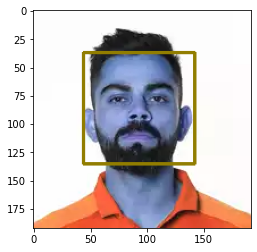

In [8]:
face_img = cv2.rectangle(img, (x,y),(x+w,y+h),(145,125,0),2)
plt.imshow(face_img)

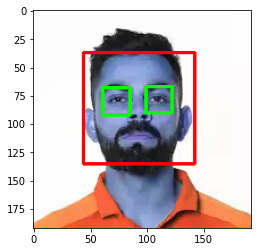

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray_img[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

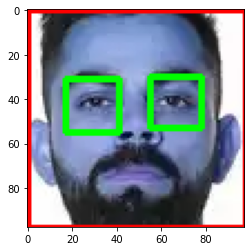

In [10]:
plt.imshow(roi_color)
plt.show()

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if(img is not None):
        cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,1.3,5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h,x:x+w]
            roi_color = img[y:y+h,x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color

(192, 192, 3)


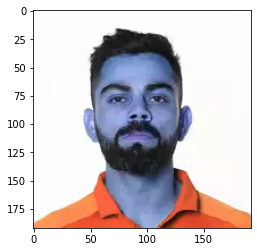

In [12]:
test_img = cv2.imread('./Test_images/virat-kohli.jpg')
print(img.shape)
#test_image = cv2.imread(r"Test_images/Roger_Federer_AP.jpg")
plt.imshow(test_img)

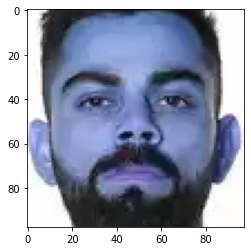

In [13]:
croped_test_img = get_cropped_image_if_2_eyes('./Test_images/virat-kohli.jpg')
plt.imshow(croped_test_img)

In [14]:
path_to_data = "./Raw_images/"
path_to_cr_data = "./Raw_images/cropped/"

In [15]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [16]:
img_dirs

['./Raw_images/cropped',
 './Raw_images/lionel_messi',
 './Raw_images/maria_sharapova',
 './Raw_images/roger_federer',
 './Raw_images/serena_williams',
 './Raw_images/virat_kohli']

In [17]:
import shutil
if os.path.exists(path_to_cr_data):   #remove the exists folder 
    shutil.rmtree(path_to_cr_data)
    
os.mkdir(path_to_cr_data) #create directory

In [18]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split("/")[-1]
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder :",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count +=1

Generating cropped images in folder : ./Raw_images/cropped/lionel_messi
Generating cropped images in folder : ./Raw_images/cropped/maria_sharapova
Generating cropped images in folder : ./Raw_images/cropped/roger_federer
Generating cropped images in folder : ./Raw_images/cropped/serena_williams
Generating cropped images in folder : ./Raw_images/cropped/virat_kohli


In [19]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./Raw_images/cropped/lionel_messi\\lionel_messi1.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi10.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi11.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi12.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi13.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi14.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi15.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi16.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi17.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi18.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi19.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi2.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi20.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi21.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi22.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi23.png',
  './Raw_images/cropped/lionel_messi\\lion

In [20]:
celebrity_file_names_dict.keys()

dict_keys(['lionel_messi', 'maria_sharapova', 'roger_federer', 'serena_williams', 'virat_kohli'])

In [21]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1
    
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [22]:
# create function to convert img to wavelet_transformed img
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY) #convert color img to gray_scale
    imArray = np.float32(imArray) #convert to float
    imArray/= 255;
    
    coeffs = pywt.wavedec2(imArray, mode, level=level) #compute co efficients
    
    #Process coefficient
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    # reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H
    

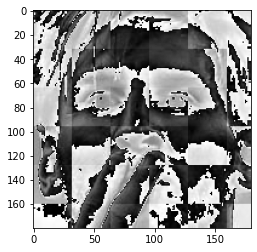

In [23]:
#Wavelet transform image
cropped_img = ("./Raw_images/cropped/lionel_messi/lionel_messi1.png")
cropped_img_arry = cv2.imread(cropped_img)
im_harr = w2d(cropped_img_arry, 'db1', 5)
plt.imshow(im_harr, cmap='gray')

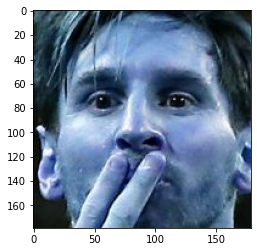

In [24]:
#original_cropped_image
oridinal_img = ("./Raw_images/cropped/lionel_messi/lionel_messi1.png")
priginal_img_arry = cv2.imread(oridinal_img)
plt.imshow(priginal_img_arry)

In [25]:
celebrity_file_names_dict

{'lionel_messi': ['./Raw_images/cropped/lionel_messi\\lionel_messi1.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi10.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi11.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi12.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi13.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi14.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi15.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi16.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi17.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi18.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi19.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi2.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi20.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi21.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi22.png',
  './Raw_images/cropped/lionel_messi\\lionel_messi23.png',
  './Raw_images/cropped/lionel_messi\\lion

In [26]:
celebrity_file_names_dict.items()

dict_items([('lionel_messi', ['./Raw_images/cropped/lionel_messi\\lionel_messi1.png', './Raw_images/cropped/lionel_messi\\lionel_messi10.png', './Raw_images/cropped/lionel_messi\\lionel_messi11.png', './Raw_images/cropped/lionel_messi\\lionel_messi12.png', './Raw_images/cropped/lionel_messi\\lionel_messi13.png', './Raw_images/cropped/lionel_messi\\lionel_messi14.png', './Raw_images/cropped/lionel_messi\\lionel_messi15.png', './Raw_images/cropped/lionel_messi\\lionel_messi16.png', './Raw_images/cropped/lionel_messi\\lionel_messi17.png', './Raw_images/cropped/lionel_messi\\lionel_messi18.png', './Raw_images/cropped/lionel_messi\\lionel_messi19.png', './Raw_images/cropped/lionel_messi\\lionel_messi2.png', './Raw_images/cropped/lionel_messi\\lionel_messi20.png', './Raw_images/cropped/lionel_messi\\lionel_messi21.png', './Raw_images/cropped/lionel_messi\\lionel_messi22.png', './Raw_images/cropped/lionel_messi\\lionel_messi23.png', './Raw_images/cropped/lionel_messi\\lionel_messi24.png', './

In [27]:
#in this i staked two images using numpy stake and separating x and y for our model
X = []
y= []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_image=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_image)
        y.append(class_dict[celebrity_name])

In [28]:
#Total images
len(X)

186

In [29]:
#size of each image
len(X[0])

4096

In [30]:
32*32*3 + 32*32

4096

In [31]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [32]:
#lets conver x into array previosly it was in list and dtypes into float
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(186, 4096)

In [33]:
X

array([[100., 129., 140., ..., 237., 234., 232.],
       [ 14.,  13.,  15., ...,   9., 250., 250.],
       [ 25.,  33.,  34., ...,  14.,   6., 220.],
       ...,
       [250., 173., 135., ...,   9.,   4., 252.],
       [ 17.,  35.,  54., ...,  32.,  62., 199.],
       [227., 114.,  27., ..., 245.,   1.,  51.]])

In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [37]:
pipe = Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel = 'rbf', C=10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.7659574468085106

In [38]:
len(x_test)

47

In [40]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.62      0.71      0.67         7
           2       0.50      0.50      0.50         6
           3       1.00      0.80      0.89        10
           4       0.81      0.93      0.87        14

    accuracy                           0.77        47
   macro avg       0.74      0.73      0.73        47
weighted avg       0.78      0.77      0.77        47



In [65]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [68]:
model_params = {
    "svm" : {
        "model" : svm.SVC(gamma="auto", probability=True),
        "params": {
            "svc__C" : [1,10,100,1000],
            "svc__kernel" : ["rbf","linear"]
        }
    },
    "random forest": {
        "model": RandomForestClassifier(),
        "params":{
            "randomforestclassifier__n_estimators": [1,5,10]
        }
    },
    "logistic regression" : {
        "model": LogisticRegression(solver = "liblinear", multi_class="auto"),
        "params":{
            "logisticregression__C":[1,5,10]
        }
    }
}

In [69]:
model_params.items()

dict_items([('svm', {'model': SVC(gamma='auto', probability=True), 'params': {'svc__C': [1, 10, 100, 1000], 'svc__kernel': ['rbf', 'linear']}}), ('random forest', {'model': RandomForestClassifier(), 'params': {'randomforestclassifier__n_estimators': [1, 5, 10]}}), ('logistic regression', {'model': LogisticRegression(solver='liblinear'), 'params': {'logisticregression__C': [1, 5, 10]}})])

In [71]:
score = []
best_estimators = {}

for algo, model_and_parameter in model_params.items():
    pipe = make_pipeline(StandardScaler(), model_and_parameter["model"])
    clf = GridSearchCV(pipe, model_and_parameter["params"], cv=10, n_jobs=-1, return_train_score=False)
    clf.fit(x_train,y_train)
    score.append({
        "model" : algo,
        "best_score" : clf.best_score_,
        "best_params": clf.best_params_,
    })
    best_estimators[algo] = clf.best_estimator_
    

In [72]:
score

[{'model': 'svm',
  'best_score': 0.778021978021978,
  'best_params': {'svc__C': 1, 'svc__kernel': 'linear'}},
 {'model': 'random forest',
  'best_score': 0.6115384615384615,
  'best_params': {'randomforestclassifier__n_estimators': 10}},
 {'model': 'logistic regression',
  'best_score': 0.8285714285714285,
  'best_params': {'logisticregression__C': 5}}]

In [73]:
best _estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [75]:
import pandas as pd
score_df = pd.DataFrame(score, columns = ["model","best_score","best_params"])
score_df

,model,best_score,best_params
0,svm,0.778022,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random forest,0.611538,{'randomforestclassifier__n_estimators': 10}
2,logistic regression,0.828571,{'logisticregression__C': 5}


In [ ]:
t_svm_score=best_estimators["svm"].score(x_test, y_test)

In [78]:
best_estimators.items()

dict_items([('svm', Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])), ('random forest', Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=10))])), ('logistic regression', Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=5, solver='liblinear'))]))])

In [80]:
best_estimators.keys()

dict_keys(['svm', 'random forest', 'logistic regression'])

In [81]:
t_svm_scores = {}
for est, params in best_estimators.items():
    t_scores=best_estimators[est].score(x_test, y_test)
    t_svm_scores[est] = t_scores

In [82]:
t_svm_scores

{'svm': 0.7446808510638298,
 'random forest': 0.6595744680851063,
 'logistic regression': 0.7659574468085106}

In [84]:
## I select logistic regresssion it performs better both training and testing datasets
best_estimator = best_estimators["logistic regression"]

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_estimator.predict(x_test))
cm

array([[ 9,  0,  1,  0,  0],
       [ 1,  5,  0,  1,  0],
       [ 0,  2,  4,  0,  0],
       [ 0,  2,  1,  7,  0],
       [ 1,  1,  1,  0, 11]], dtype=int64)

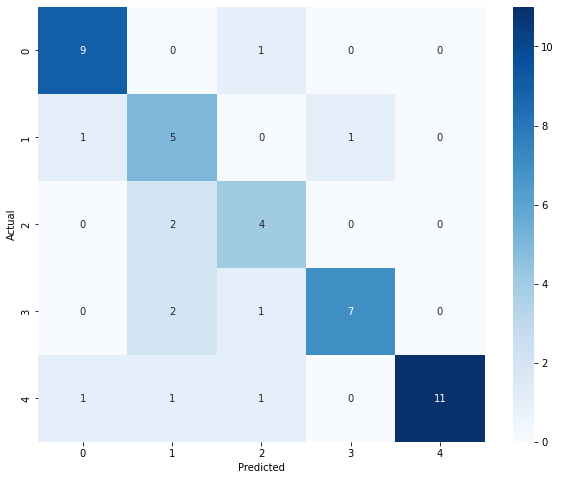

In [87]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot = True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [88]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [89]:
!pip install joblib

In [90]:
##Save the model
import joblib
joblib.dump(best_estimator, "classifier_model.pkl")

['classifier_model.pkl']

In [92]:
import json
with open("class_dict.json","w") as f:
    f.write(json.dumps(class_dict))